In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('events.csv', low_memory=False)

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
file.head(20)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [5]:
file['time'] = pd.to_datetime(file['timestamp'])
file['month'] = file['time'].dt.month

# Compras segun tipo de dispositivo del cual acceden

In [6]:
conv = file.loc[file['event']=='conversion'] 

In [7]:
visited = file.loc[file['event']=='visited site']

In [8]:
#la nueva columna 'compro' en el dataframe de visited site dice si el usuario realizo una compra o no
visited['Compro'] = visited['person'].isin(conv['person'])

/home/javier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
#tomo los que compraron y agrupo por dispositivo
gb = visited.loc[visited['Compro']==True].groupby('device_type')

In [10]:
#agarro la cantidad de personas unicas que compraron por si hay repetidos
compraron = gb.agg({'person':'nunique'})

In [11]:
#agarro el total de visitas por dispositivo
total = visited.groupby('device_type').agg({'person':'nunique'})

In [12]:
#meto todo en un solo dataframe
compraron['total'] = total['person']
compraron

,person,total
device_type,,
Computer,460,12413
Smartphone,363,14610
Tablet,8,495
Unknown,1,44


In [26]:
# renombro las columnas para que quede mas lindo y meto una nueva con el porcentaje que compró por dispositivo
compraron.columns = ['Compras','Visitas']
compraron['porcentaje'] = (compraron['Compras']/compraron['Visitas'])*100

In [27]:
compraron

,Compras,Visitas,porcentaje
device_type,,,
Computer,460,12413,3.705792
Smartphone,363,14610,2.484600
Tablet,8,495,1.616162
Unknown,1,44,2.272727


Text(0.5,1,'Personas que compraron por dispositivo vs el total que entraron por ese dispositivo')

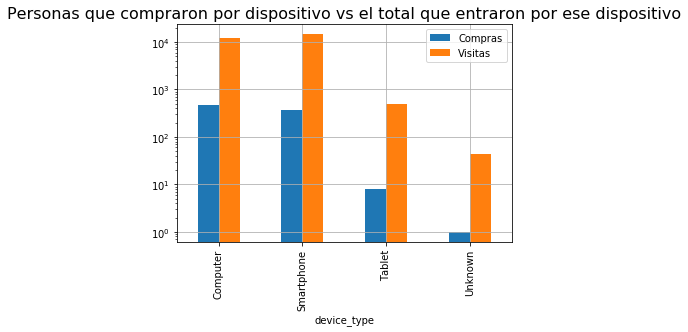

In [14]:
compraron.plot.bar(y=['Compras','Visitas']) #ploteo compras vs visitas
plt.yscale('log') #escala logaritmica porque hay mucha diferencia entre compras y visitas
plt.grid() #mostrar el grid
plt.title('Personas que compraron por dispositivo vs el total que entraron por ese dispositivo',size=16)

##### Vemos que hay mas visitas desde smartphone pero más compras desde computer

# Visitas segun canal que las originó, evolucion en el tiempo

In [29]:
visited['month'].value_counts().to_frame()

,month
5,40137
6,22419
4,12650
3,7247
2,2790
1,2135


In [16]:
#agrupo las visitas por mes y calculo en cada uno la cantidad de visitas por cada channel
a = visited.groupby('month').agg({'channel':'value_counts'})

In [30]:
a

channel
month channel          
1     Paid          711
      Direct        618
      Referral      402
      Organic       352
      Social         51
      Email           1
2     Paid         1196
      Direct        819
      Referral      424
      Organic       310
      Social         38
      Email           3
3     Paid         3354
      Direct       1861
      Referral     1095
      Organic       796
      Social        124
      Email          17
4     Paid         5606
      Direct       3548
      Referral     1940
      Organic      1504
      Social         39
      Email          12
      Unknown         1
5     Paid        20632
      Direct       8214
      Organic      5770
      Referral     5211
      Social        267
      Email          35
      Unknown         8
6     Paid        12694
      Organic      3616
      Direct       3462
      Referral     2312
      Social        327
      Email           8

In [17]:
#unstack para el index asi me quedan como columnas mas lindo
forgraph = a.unstack().head(5) #me quedo hasta mayo porque junio tiene solo la mitad y
                                #obviamente va a tener menos visitas

In [18]:
forgraph

channel                                               
channel  Direct Email Organic     Paid Referral Social Unknown
month                                                         
1         618.0   1.0   352.0    711.0    402.0   51.0     NaN
2         819.0   3.0   310.0   1196.0    424.0   38.0     NaN
3        1861.0  17.0   796.0   3354.0   1095.0  124.0     NaN
4        3548.0  12.0  1504.0   5606.0   1940.0   39.0     1.0
5        8214.0  35.0  5770.0  20632.0   5211.0  267.0     8.0

In [19]:
#dropeo el unknown que es poco significativo
sinunknown = forgraph.drop('Unknown',axis=1,level=1)

AxesSubplot(0.125,0.125;0.775x0.755)


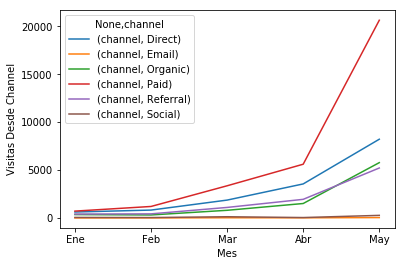

In [33]:
g=sinunknown.plot()
g.set_xticks(ticks=[1,2,3,4,5])                    # esto es para renombrar los valores del eje x porque 
g.set_xticklabels(['Ene','Feb','Mar','Abr','May']) # sino pone los meses como floats (re cualquiera mal)
g.set_xlabel('Mes')
g.set_ylabel('Visitas Desde Channel')
print(g)